In [19]:
import pandas as pd;
import os
import matplotlib.pyplot as plt
path='/Users/kieuanh/Documents/cao học/ky 1/khai phá dữ liệu và học máy/Sales Reporting /';


In [20]:
frames=[]

for f in os.listdir(path):
    if f.endswith('.csv'):
        filepath = path + f
        df1=pd.read_csv(filepath)
        frames.append(df1)
        result =pd.concat(frames)
df = result
df.to_csv('annulSales2019.csv', index=False)

In [25]:
df['Month']=df['Order Date'].str.slice(0, 2, 1)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [ ]:
# Task 2.2: Add 'Month' collumn

In [26]:
print(set(df['Month']))

{nan, '02', '10', '03', '09', '01', 'Or', '04', '12', '07', '05', '08', '11', '06'}


In [44]:
# Task 2.3: Get rid of "NAN" and "OR" value


In [27]:
df=df.dropna(how='all')

In [28]:
# Kiem tra xem dong nao co gia tri "OR", gộp vào bị gộp cả tiêu đề
df=df[df['Month']!='Or']

In [29]:
# Tháng nào có doanh số tốt nhất, doanh số tháng đó là bao nhiêu
# Tính số lượng * đơn giá
df['Sales'] = pd.to_numeric(df['Quantity Ordered'], downcast='integer')*pd.to_numeric(df['Price Each'], downcast='integer')
# Lỗi do không phải dạng số nên không nhân được nên cần ép kiểu sang số nguyên
# Kiểm tra kiểu dữ liệu 
# print(df['Quantity Ordered'].dtypes)


In [30]:
# Cắt collum và lưu lại
moving_colum = df.pop('Sales');

In [31]:
df.insert(4, 'Sales', moving_colum)

In [61]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,162009,iPhone,1,700,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
1,162009,Lightning Charging Cable,1,14.95,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
2,162009,Wired Headphones,2,11.99,23.98,03/28/19 20:59,"942 Church St, Austin, TX 73301",03
3,162010,Bose SoundSport Headphones,1,99.99,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03
4,162011,34in Ultrawide Monitor,1,379.99,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03


In [32]:
sales_value = df.groupby('Month').sum()['Sales']


In [33]:
sales_value.max()

4613443.34

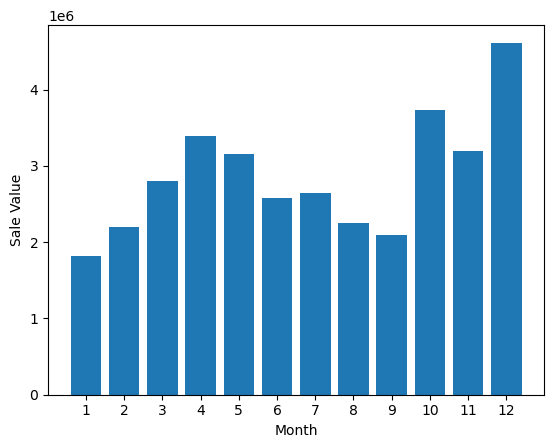

In [34]:
# Vẽ biểu đồ 
months = range(1, 13)
plt.bar(x=months, height=sales_value)
plt.xticks(months)
plt.xlabel("Month")
plt.ylabel("Sale Value")
plt.show()

In [75]:
# Thành phố nào có doanh số lớn nhất

In [35]:
# sample_address= '942 Church St, Austin, TX 73301'
# s = sample_address.split(',')
# print(s[1])

# def getCity(sample_address): 
#     return sample_address.split(',')[1]
address_to_city = lambda address:address.split(',')[1]

In [38]:
df['City'] = df['Purchase Address'].apply(address_to_city)

In [40]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,162009,iPhone,1,700,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
1,162009,Lightning Charging Cable,1,14.95,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
2,162009,Wired Headphones,2,11.99,23.98,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,Austin
3,162010,Bose SoundSport Headphones,1,99.99,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,San Francisco
4,162011,34in Ultrawide Monitor,1,379.99,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,San Francisco


In [41]:
city_collum = df.pop('City')

In [42]:
df.insert(6, 'City', city_collum)

In [43]:
sales_by_city=df.groupby('City').sum()['Sales']
sales_by_city

City
 Atlanta          2795498.58
 Austin           1819581.75
 Boston           3661642.01
 Dallas           2767975.40
 Los Angeles      5452570.80
 New York City    4664317.43
 Portland         2320490.61
 San Francisco    8262203.91
 Seattle          2747755.48
Name: Sales, dtype: float64

[' Atlanta', ' Austin', ' Boston', ' Dallas', ' Los Angeles', ' New York City', ' Portland', ' San Francisco', ' Seattle']


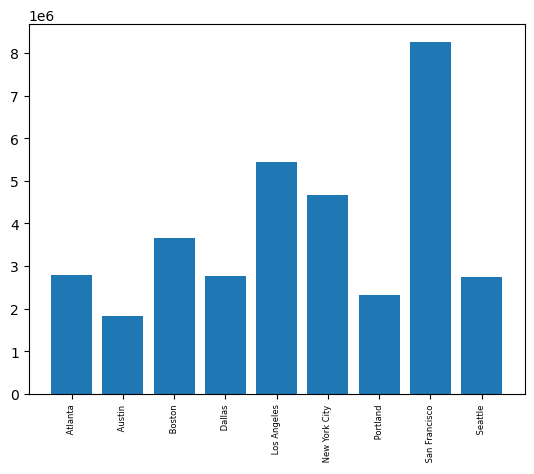

In [44]:
cities = []
for c, s in sales_by_city.items():
    cities.append(c)
print(cities)
plt.bar(x=cities, height=sales_by_city)
plt.xticks(cities, rotation=90, size=6)
plt.show()

In [45]:
print(df['Order Date'].dtypes)

object


In [47]:
# Doanh nghiệp nên chiếu quảng cáo vào thời gian nào trong ngày để tăng lượng mua hàng
df['Order Date'] = pd.to_datetime(df['Order Date'])


In [53]:
df['Hours'] = df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,City,Purchase Address,Month,Hours
0,162009,iPhone,1,700,700.00,2019-03-28 20:59:00,Austin,"942 Church St, Austin, TX 73301",03,20
1,162009,Lightning Charging Cable,1,14.95,14.95,2019-03-28 20:59:00,Austin,"942 Church St, Austin, TX 73301",03,20
2,162009,Wired Headphones,2,11.99,23.98,2019-03-28 20:59:00,Austin,"942 Church St, Austin, TX 73301",03,20
3,162010,Bose SoundSport Headphones,1,99.99,99.99,2019-03-17 05:39:00,San Francisco,"261 10th St, San Francisco, CA 94016",03,5
4,162011,34in Ultrawide Monitor,1,379.99,379.99,2019-03-10 00:01:00,San Francisco,"764 13th St, San Francisco, CA 94016",03,0


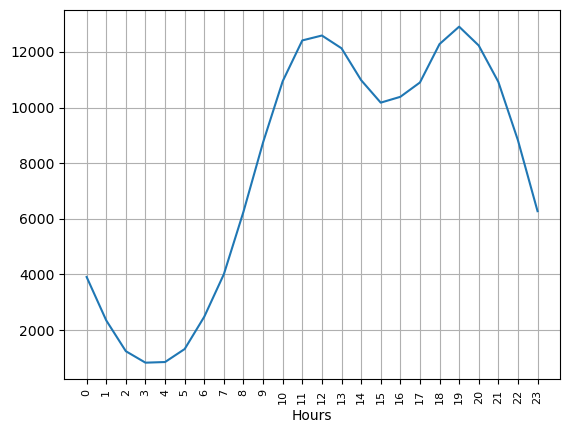

In [59]:
sale_value_hours = df.groupby('Hours').count()['Sales']
hours = [hour for hour, sale in sale_value_hours.items()]
plt.plot(hours, sale_value_hours)
plt.xlabel('Hours')
plt.grid()
plt.xticks(hours, rotation=90, size=8)
plt.show()
